# Word statistics on open source in environmental sustainability

## Ideas and ToDo
Compare with: https://blogs.reading.ac.uk/weather-and-climate-at-reading/2021/whats-that-data-why-and-how-the-geoscientific-community-is-forging-metadata-standards/
https://github.com/sadielbartholomew/cf-standard-names-linguistics
https://sadielbartholomew.github.io/cf-standard-names-linguistics/

In [1]:
!pip install nltk pandas yake multi_rake wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 570.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 4.5 MB/s eta 0:00:00
  Created wheel for pycld2: filename=pycld2-0.41-cp310-cp310-linux_x86_64.whl size=9904070 sha256=d2baeaffc21e594fada5baf65caa4d3a8bb717c37707b25cb3e190e87561a066
  Stored in directory: /root/.cache/pip/wheels/be/81/31/240c89c845e008a93d98542325270007de595bfd356eb0b06c
Successfully built pycld2


In [2]:
import requests
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

URL = "https://ost.ecosyste.ms/api/v1/projects?reviewed=true&per_page=3000"
FILE_TO_SAVE_AS = "projects.json" # the name you want to save file as


resp = requests.get(URL) # making requests to server

with open(FILE_TO_SAVE_AS, "wb") as f: # opening a file handler to create new file
    f.write(resp.content) # writing content to file

In [3]:
raw = pd.read_json(resp.content.decode())
print(raw.shape)
raw.head()

(1962, 29)


,id,name,description,url,last_synced_at,repository,owner,packages,commits,issues_stats,events,keywords,dependencies,score,created_at,updated_at,avatar_url,language,category,sub_category,monthly_downloads,readme,funding_links,readme_doi_urls,works,citation_counts,total_citations,project_url,html_url
0,910,semanticClimate,Conversion of IPCC documents into semantic form.,https://github.com/petermr/semanticClimate,2024-06-10 11:31:11.973000+00:00,"{'uuid': '499415613', 'full_name': 'petermr/se...","{'login': 'petermr', 'name': None, 'uuid': '73...",[],"{'full_name': 'petermr/semanticClimate', 'defa...","{'full_name': 'petermr/semanticClimate', 'html...","{'total': {'IssuesEvent': 10, 'WatchEvent': 30...",[],"[{'ecosystem': 'pypi', 'filepath': 'abbreviati...",6.467699,2023-09-11 11:54:36.313000+00:00,2024-06-10 11:31:11.979000+00:00,https://github.com/petermr.png,HTML,Climate Change,Climate Data Processing and Analysis,0,None,[],[],{},{},0,https://ost.ecosyste.ms/api/v1/projects/910,https://ost.ecosyste.ms/projects/910
1,192792,SMART,"Collect, measure and evaluate data to improve ...",https://smartconservationtools.org/en-us,2024-06-10 10:30:11.029000+00:00,None,None,[],None,None,None,[],None,0.000000,2024-05-15 00:08:58.408000+00:00,2024-06-10 10:30:11.031000+00:00,None,None,Biosphere,Conservation and Restoration,0,None,[],[],{},{},0,https://ost.ecosyste.ms/api/v1/projects/192792,https://ost.ecosyste.ms/projects/192792
2,193157,NYC Environment and Health Data Portal,"Shows how environments affect health in NYC, b...",https://github.com/nychealth/eh-dataportal,2024-06-10 10:01:19.025000+00:00,"{'id': 49615238, 'uuid': '508297840', 'full_na...","{'login': 'nychealth', 'name': 'NYC Department...",[],"{'full_name': 'nychealth/eh-dataportal', 'defa...","{'full_name': 'nychealth/eh-dataportal', 'html...",None,[],"[{'ecosystem': 'actions', 'filepath': '.github...",5.877736,2024-05-21 00:17:09.961000+00:00,2024-06-10 10:01:19.028000+00:00,https://github.com/nychealth.png,HTML,Sustainable Development,Data Catalogs and Interfaces,0,None,[],[],{},{},0,https://ost.ecosyste.ms/api/v1/projects/193157,https://ost.ecosyste.ms/projects/193157
3,193112,CoachCO2,Aims to raise user awareness about their carbo...,https://github.com/cozy/coachco2,2024-06-10 10:01:05.925000+00:00,"{'id': 36961619, 'uuid': '419674297', 'full_na...","{'login': 'cozy', 'name': 'Cozy.io', 'uuid': '...",[],"{'full_name': 'cozy/coachco2', 'default_branch...","{'full_name': 'cozy/coachco2', 'html_url': 'ht...",None,[],"[{'ecosystem': 'npm', 'filepath': 'package.jso...",5.337538,2024-05-21 00:04:55.498000+00:00,2024-06-10 10:01:05.928000+00:00,https://github.com/cozy.png,JavaScript,Consumption,Mobility and Transportation,0,[![Travis build status shield](https://img.shi...,[],[],{},{},0,https://ost.ecosyste.ms/api/v1/projects/193112,https://ost.ecosyste.ms/projects/193112
4,190478,ApsimX,An agricultural modeling framework used extens...,https://github.com/apsiminitiative/apsimx,2024-06-10 09:32:15.144000+00:00,"{'id': 30085115, 'uuid': '33634731', 'full_nam...","{'login': 'APSIMInitiative', 'name': 'APSIM In...",[],"{'full_name': 'APSIMInitiative/ApsimX', 'defau...","{'full_name': 'APSIMInitiative/ApsimX', 'html_...","{'total': {'IssuesEvent': 1, 'IssueCommentEven...",[],"[{'ecosystem': 'npm', 'filepath': 'Docs/themes...",10.598683,2024-04-03 00:05:28.735000+00:00,2024-06-10 09:32:15.147000+00:00,https://github.com/APSIMInitiative.png,C#,Consumption,Agriculture and Nutrition,0,# ApsimX\n\nApsimX is the next generation of [...,[],[https://dx.doi.org/10.1016/j.envsoft.2014.07....,{},{},0,https://ost.ecosyste.ms/api/v1/projects/190478,https://ost.ecosyste.ms/projects/190478


In [4]:
import pandas as pd
pd.set_option('display.max_columns',200)
pd.set_option('display.max_colwidth', 50)

#https://www.nltk.org/
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stpwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [5]:
len(raw)

1962

# 1. Goal: Reduce the list of topics below into subtopics


In [6]:
raw['category'].value_counts()

category
Biosphere                  280
Consumption                269
Climate Change             237
Energy Systems             207
Natural Resources          175
Sustainable Development    167
Hydrosphere                145
Renewable Energy           127
Atmosphere                 125
Emissions                   90
Industrial Ecology          54
Cryosphere                  51
Energy Storage              35
Name: count, dtype: int64

In [7]:
raw['sub_category'].value_counts()

sub_category
Energy Modeling and Optimization            117
Biodiversity and Species Distribution        82
Water Supply                                 80
Mobility and Transportation                  73
Buildings and Heating                        70
Agriculture and Nutrition                    66
Soil and Land                                65
Photovoltaics and Solar Energy               59
Freshwater and Hydrology                     58
Climate Data Processing and Analysis         56
Computation and Communication                55
Forest Observation and Management            55
Meteorological Observation and Forecast      53
Marine Life and Fishery                      50
Earth and Climate Modeling                   50
Emission Observation and Modeling            47
Natural Hazard and Storm                     45
Data Catalogs and Interfaces                 43
Climate Data Access and Visualization        43
Energy Distribution and Grids                43
Wind Energy                

In [8]:
df = raw[['name','description','category','sub_category','owner','readme']]
df.head()

,name,description,category,sub_category,owner,readme
0,semanticClimate,Conversion of IPCC documents into semantic form.,Climate Change,Climate Data Processing and Analysis,"{'login': 'petermr', 'name': None, 'uuid': '73...",None
1,SMART,"Collect, measure and evaluate data to improve ...",Biosphere,Conservation and Restoration,None,None
2,NYC Environment and Health Data Portal,"Shows how environments affect health in NYC, b...",Sustainable Development,Data Catalogs and Interfaces,"{'login': 'nychealth', 'name': 'NYC Department...",None
3,CoachCO2,Aims to raise user awareness about their carbo...,Consumption,Mobility and Transportation,"{'login': 'cozy', 'name': 'Cozy.io', 'uuid': '...",[![Travis build status shield](https://img.shi...
4,ApsimX,An agricultural modeling framework used extens...,Consumption,Agriculture and Nutrition,"{'login': 'APSIMInitiative', 'name': 'APSIM In...",# ApsimX\n\nApsimX is the next generation of [...


# 2. Sample Row

In [9]:
import re
import yake

In [10]:
# Removing words
words_black_list = ['python','pvlib','projects','affiliated','http','readthedocs','benchmarks','license','matlab','user','guide','html','https','open','source','journal',
                    'latest','release','build','publications','conda','installed','google','documentation','please']

## Yake for keyword Extraction
* Using our sample text, we will apply Yake's keyword extraction algorithm

## Rake for keyword Extracion

In [11]:
from multi_rake import Rake

## KeyBERT for keyword extraction
* Using our sample text, we will apply Yake's keyword extraction algorithm

In [12]:
#from keybert import KeyBERT

In [13]:
#kw_model = KeyBERT('distilbert-base-nli-mean-tokens')

# 3. Cleaning Full Dataset

In [14]:
# Fill null values with 'None'. This will allow us to concatenate the relevant text columns
df = df.fillna('None')

In [15]:
# Combine text columns
combined = df['description']

In [16]:
df['combined'] = combined
df.head()

,name,description,category,sub_category,owner,readme,combined
0,semanticClimate,Conversion of IPCC documents into semantic form.,Climate Change,Climate Data Processing and Analysis,"{'login': 'petermr', 'name': None, 'uuid': '73...",None,Conversion of IPCC documents into semantic form.
1,SMART,"Collect, measure and evaluate data to improve ...",Biosphere,Conservation and Restoration,None,None,"Collect, measure and evaluate data to improve ..."
2,NYC Environment and Health Data Portal,"Shows how environments affect health in NYC, b...",Sustainable Development,Data Catalogs and Interfaces,"{'login': 'nychealth', 'name': 'NYC Department...",None,"Shows how environments affect health in NYC, b..."
3,CoachCO2,Aims to raise user awareness about their carbo...,Consumption,Mobility and Transportation,"{'login': 'cozy', 'name': 'Cozy.io', 'uuid': '...",[![Travis build status shield](https://img.shi...,Aims to raise user awareness about their carbo...
4,ApsimX,An agricultural modeling framework used extens...,Consumption,Agriculture and Nutrition,"{'login': 'APSIMInitiative', 'name': 'APSIM In...",# ApsimX\n\nApsimX is the next generation of [...,An agricultural modeling framework used extens...


In [17]:
# Words to remove from column. We will keep adding to this list the more words we find that are irrelavent
words_black_list_small = ['python','projects','affiliated','http','readthedocs','benchmarks',
                    'license','matlab','user','guide','html','https','open','source','journal',
                    'latest','release','build','publications','conda','installed','users','using'
                    'google','documentation','please','github','data','model','install','code',
                    'package','badge','project']

In [18]:
# More words to remove
words_black_list_large = ['python','tool','based','pvlib','projects','affiliated','http','readthedocs','benchmarks','aims','high','series','functions','large','calculate','applications','flow','easy','contains','state','collection','real','flexsible','program','implementation','evaluate','track','engineering',
                    'license','matlab','user','guide','html','https','open','source','journal','various','written','toolbox','working','design','related','level','deep','standard','within','applications','methods','toolkits','multi','network','coupled','platform','application','developed','possible',
                    'latest','release','build','publications','conda','installed','users','using','julia','different','toolkit','toolkit','provide','focus','smart','simple','enables','sources','client','advanced','digital','across','suite','domain','estimate','evaluation','measurements','statistical',
                    'google','documentation','please','github','data','model','install','code','numerical','simulation','algorithms','driven','interactive','helps', 'package','resolution','visualization','images','explore','develop','analysis','distributed','calculations','global','control','accessible',
                    'package','badge','project','version','file','view','system','master','used','also','providing','enable','multiple','point','image','process','including','components','computer','easily','built','range','line','calculations','term','uses','faciliate','online','study','evaluate',
                    'repository','example','docs','files','information','models','software','available','work','making','visualize','format','load','usage','module','apis','automated','temporal','curated','variable','best','variables','websites','sets','near','worldwide','automatic','problems','custom',
                    'zenodo','command','modis','pull','request','pctl','theoj','brodiepearson','blob','getting','order','fast','daily','makes','domaine','around','processes','associated','long','type','clean','optimal','many','awesome','extract','three','variety','useful','inventory','allowing',
                    'started','machine','learning','make','sure','pypi','ipcc','main','scholor','colorado','codecov','individual','researchers','historical','metadata','supporting','finite','analyze','databases','chemical','initiative','technologies','collect','hourly','given','solver','space',
                    'none','jupyter','notebook','united','states','docker','anaconda','forge','datasets','false','would','reference','tracking','identify','general','techniques','scripts','world','libraries','estimating','neutral','response','algorithm','ground','retrieving','retrieve','quantitative',
                    'like','gustavoirgang','google','collab','sciencedirect','yaml','downloads','actions','workflows', 'understanding','international','compute','gridded','studies','single','calculates','exchange','potential','robust','dimensional','reporting','development','simulations','flexsible',
                    'media','icon','joss','papers','legend','description','jobs','download','input','output','latitude','longitude','analyse','measurement','directly','official','sheet','classifications','find','features','computational','operations','grids','includes','text','standardized','dedicated','easier','purpose',
                    'unit','tests','cran','nbsp','colab','check','plot','ncss','contributing','installation', 'instructions','fortran','complex','simulating','component','access','bottom','flexible','search','agent','results','needed','creating','friendly','basic','linear','assess','wrapper','defined','wide','method',
                    'wiki','wikipedia','feel','free','name','list','issues','start','examples','index','dataset','branch','create','high','performance','management','scale','website','codes','programs','downnloading','utility','imagery','events','websites','share','solutions','published',
                    'enabling','specification','semantic','inputs','query','vertical','estimates','freely','several','object','specific','parameters','discover','accelerate','calculating','functionality','cover','testing','operation','reinforcement','form','perform',
                    'better','towards','layer','evaluating','speed','comprehensive','cells','energyplus','derived','interactions','layers','emis','emerging','apps','hardware','past','read','android','utilities','nrel','better','repositories','simulate','oriented','european','tastes',
                    'availability','part','language','extent','europe','german','germany','quickly','approach','total','programming','short','visualise','produced','intended','quantifying','availability','plugin',
                    'server','noaa','existing','volume','primary','canada','post','core','carlo','platforms','gtfs','visualizations','chain','independent','benchmark','modules','change','changes',
                    'probabilistic','criteria','benchmark','scaleable','scales','mission','empirical','inventories','parallel','consistent','organization','countries','collaboration','agency','devices','sensor','sensors','goals','neutral','area',
                    'administration','meant','toolset','mixed','store','attrributes','unidata','improve','netcdf','supports','complete','levels','promote','levels','complete','collections','nasa','summary','conditions','effects',
                    'options','usgs','australian','commercial','monte','capable','neutral','save','generate','manage','factors','modelica','rapid','boundary','relevant','simulates','powerful','stakeholders','dynamics',
                    'containing','aware','operators','reading','notebooks','calculator','visualizing','statistics','direction','ensemble','automate','edge','xarray','integrating','along',
                    'host','show','document','compute','handle','converter','sample','collect','explore','flow','solve',
                    'explore','accurate','combine','signal','best','portfolio','removel','interact','extract','flow','interest','chemistry','detect','value','size','conduct','coordinate','class','obtain','attribute','group','trend','document','company','mean','sample','index',
                    'mesh','cross','loading','survay','neutral','centre','parameter','necessary','integration','years','maintained','conventional','active','hyprid','reliable','ability','training','representation','ready','super',
                    'routing','converts','benchmarking','specified','modern','offers','downloading','detect','apply','role','commonly','specifically','generalized','enhanced','routines','panel',
                    'external','generated','spred','generic','organization','elevation','stack','equivalent','lagrangian','generalized','generalized','report','things','organizations','java','display',
                    'next','analyzing','structured','practices','combines','widely','structure','qgis','operational','assessing','generates','characteristics','institute','estimation','determine','practitioners','benefit','particle','scale','technical','setup',
                    'modeling','national','quality','modelling','service','modular','neutral','small','australia','cell','british','columbia','generating','analyses','sharing','notebook','experiments','portal','types','quantify','artificial','focused','protocol','highly','equations','first','tasks','arduino','suitable','automation','compare','comparison',
                    'library','following','test','running','import','database','access','packages','directory','need','tools','simulation','time','framework','systems','designed','community','interface','optimization','allows','support','grid','research','processing','help','provides']

In [19]:
len(words_black_list_large)

693

In [20]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# initialize lemmatizer
lemmatizer = WordNetLemmatizer()


def lemmatize_tokens(tokens):
    # convert POS tag to WordNet format
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    # lemmatize tokens
    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]

    return lemmas

In [21]:
# Create new column called "cleaned_text" and apply different cleaning methods
df['cleaned_text'] = df['combined'].apply(lambda x: x.replace("\\n", " ")) # Replace \\n
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x.lower() for x in str(x).split())) # Lowercase
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x)) # Remove HTML tags
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]',' ', x)) # Remove symbols
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if len(x) > 3)) # Remove short words
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if x.isalpha())) # Remove numbers
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in words_black_list_large)) # Remove words from blacklist
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in stpwords)) # Remove stopwords



In [22]:
df['cleaned_text']

0                                    conversion documents
1       measure effectiveness wildlife conservation ef...
2       shows environments affect health publishing ex...
3       raise awareness carbon footprint notably trans...
4                                agricultural extensively
                              ...                        
1957    field boundaries agriculture field openly unified
1958                          articles weather lwms learn
1959    aimed context decision environmental groundwat...
1960    transparent collaborative evidence establishin...
1961    sustainable companies initiatives visible tomo...
Name: cleaned_text, Length: 1962, dtype: object

# 4. Unique Words



In [23]:
from collections import Counter

# Tokenize text
tokenized_data = [nltk.word_tokenize(text) for text in df['cleaned_text']]

# lemmatize
tokenized_data = [lemmatize_tokens(tokens) for tokens in tokenized_data]

# count the occurrence of each token
token_counts = [Counter(tokens) for tokens in tokenized_data]

# combine the counts from all rows
combined_counts = sum(token_counts, Counter())

In [24]:
# print the top 30 most common tokens
word_freq = combined_counts.most_common(300)
word_freq

[('energy', 285),
 ('climate', 221),
 ('water', 117),
 ('power', 101),
 ('carbon', 83),
 ('earth', 81),
 ('emission', 81),
 ('environmental', 80),
 ('weather', 80),
 ('building', 69),
 ('wind', 65),
 ('ocean', 63),
 ('plant', 58),
 ('impact', 57),
 ('assessment', 56),
 ('soil', 55),
 ('atmospheric', 54),
 ('science', 51),
 ('land', 50),
 ('electricity', 50),
 ('surface', 48),
 ('solar', 48),
 ('forest', 47),
 ('environment', 45),
 ('specie', 41),
 ('cloud', 38),
 ('consumption', 37),
 ('satellite', 37),
 ('integrate', 37),
 ('resource', 37),
 ('ecosystem', 34),
 ('biodiversity', 33),
 ('tree', 32),
 ('meteorological', 31),
 ('product', 31),
 ('forecast', 31),
 ('marine', 30),
 ('battery', 30),
 ('monitoring', 30),
 ('transport', 29),
 ('forecasting', 29),
 ('generation', 28),
 ('common', 28),
 ('cost', 28),
 ('well', 28),
 ('distribution', 28),
 ('atmosphere', 27),
 ('service', 26),
 ('cycle', 25),
 ('greenhouse', 25),
 ('market', 25),
 ('observation', 25),
 ('scenario', 25),
 ('temper

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

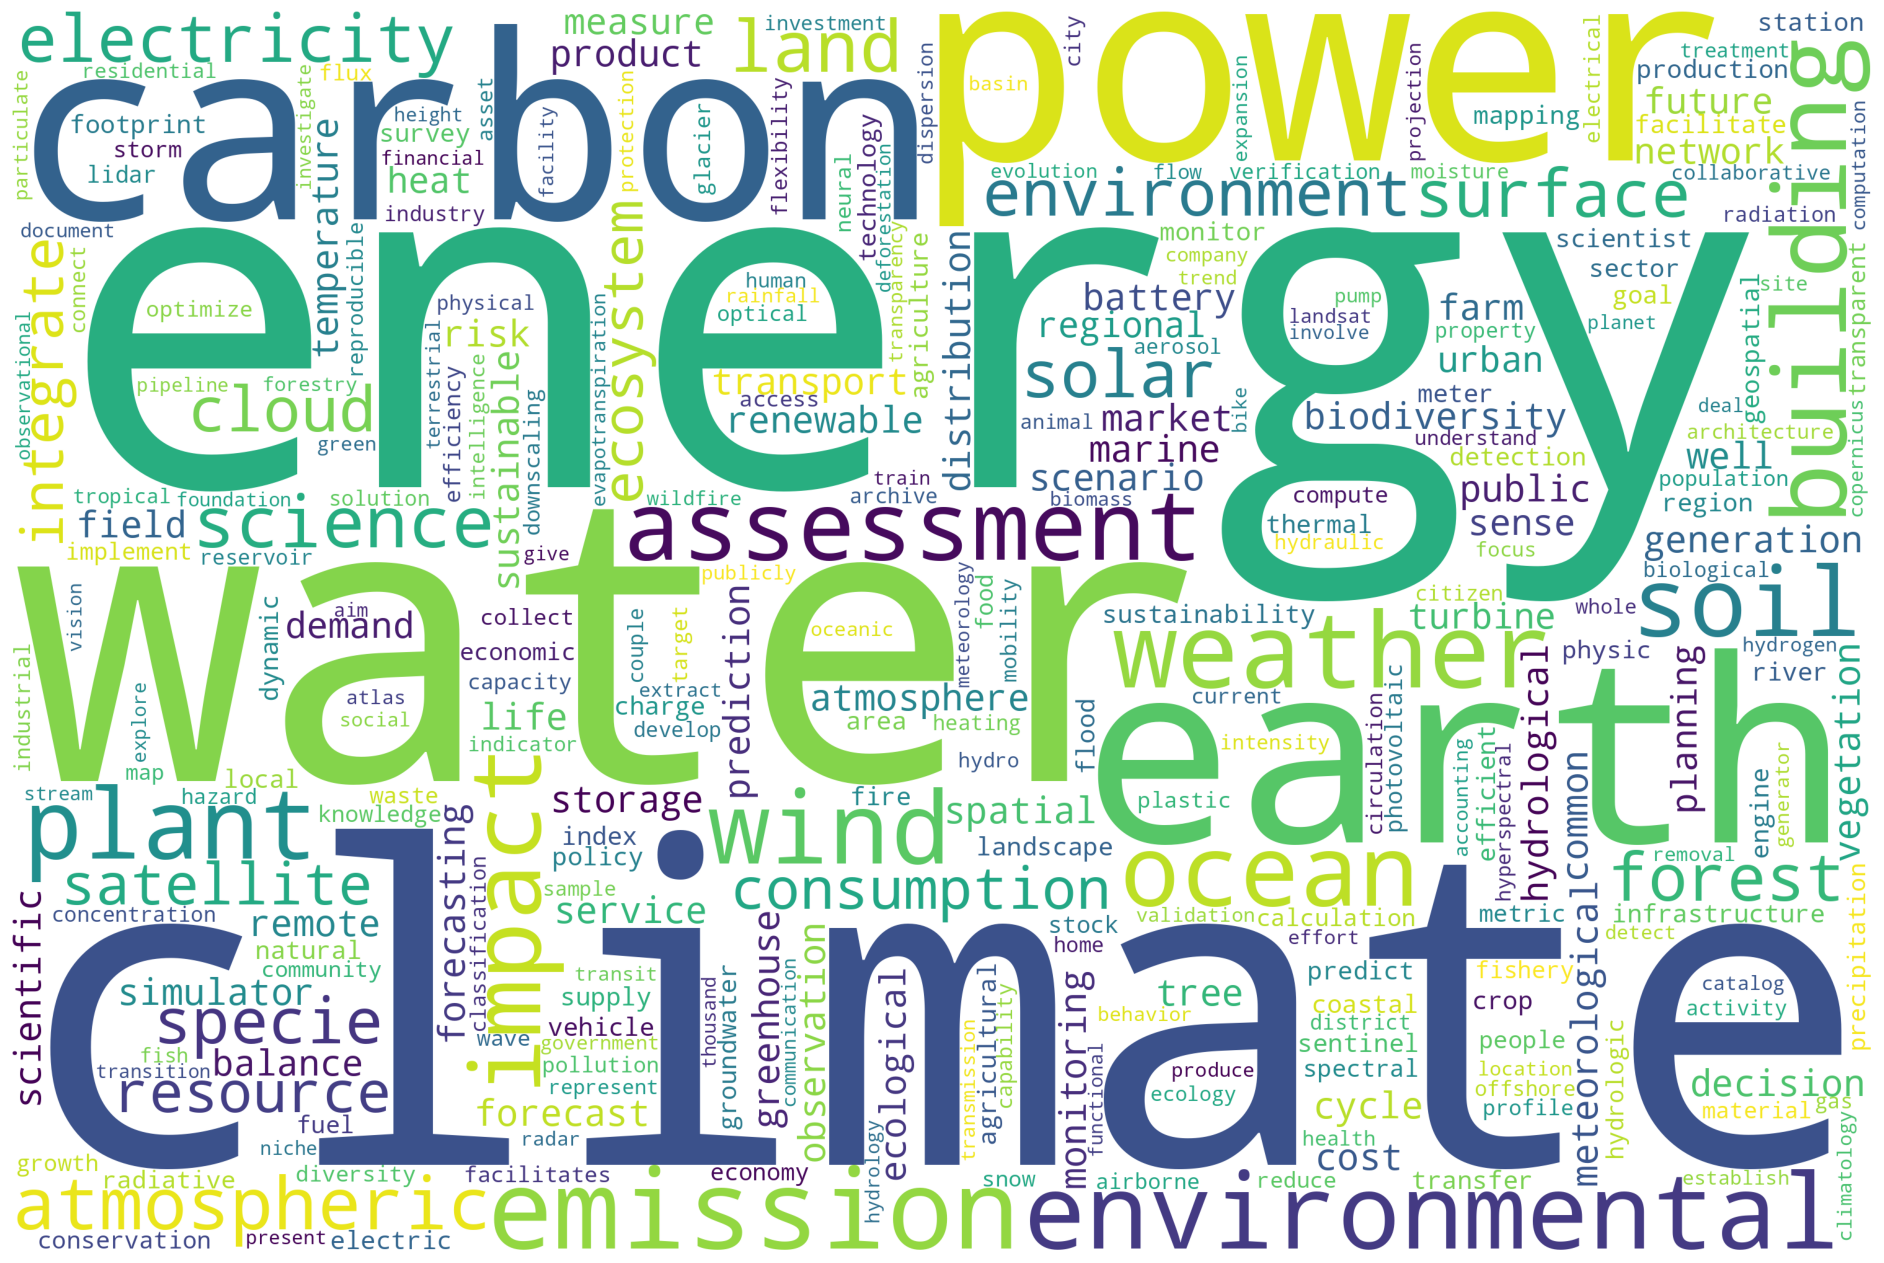

In [26]:
wc = WordCloud(background_color="white", max_words=300,width=3000,height=2000,relative_scaling=0.2)
wc.generate_from_frequencies(dict(word_freq))
plt.figure(figsize=(20,20))
plt.clf()
plt.imshow(wc)
plt.axis('off')
plt.show()

# 5. Unique Bigrams and Trigrams

In [27]:
df['cleaned_text'].str.split()

0                                 [conversion, documents]
1       [measure, effectiveness, wildlife, conservatio...
2       [shows, environments, affect, health, publishi...
3       [raise, awareness, carbon, footprint, notably,...
4                             [agricultural, extensively]
                              ...                        
1957    [field, boundaries, agriculture, field, openly...
1958                     [articles, weather, lwms, learn]
1959    [aimed, context, decision, environmental, grou...
1960    [transparent, collaborative, evidence, establi...
1961    [sustainable, companies, initiatives, visible,...
Name: cleaned_text, Length: 1962, dtype: object

In [28]:
df['cleaned_text_bigrams'] = df['combined'].apply(lambda x: x.replace("\\n", " ")) # Replace \\n
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: ' '.join(x.lower() for x in str(x).split())) # Lowercase
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x)) # Remove HTML tags
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]',' ', x)) # Remove symbols
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: ' '.join(x for x in str(x).split() if len(x) > 3)) # Remove short words
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: ' '.join(x for x in str(x).split() if x.isalpha())) # Remove numbers
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in words_black_list_small)) # Remove words from blacklist
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in stpwords)) # Remove stopwords

In [29]:
# Create list of words in the order in which they orignally appear
words = list(df['cleaned_text_bigrams'].str.split().apply(pd.Series).stack().reset_index(drop = True))

In [30]:
# Most frequent bigrams
bigrams = (pd.Series(nltk.ngrams(words, 2)).value_counts()).to_frame()

In [31]:
type(bigrams)

pandas.core.frame.DataFrame

In [32]:
bigrams.head(300)

,count
"(climate, change)",34
"(time, series)",33
"(machine, learning)",30
"(energy, systems)",30
"(earth, system)",25
"(real, time)",25
"(power, system)",25
"(energy, system)",23
"(energy, consumption)",20
"(deep, learning)",19


In [33]:
# This are the bigrams manually filtered to match to the OpenSustain.tech database
bigrams_ost = ["climate change","energy systems","power system","earth system","energy system","energy consumption","power systems","remote sensing","renewable energy","water quality","life cycle","radiative transfer","weather climate","integrated assessment","wind energy","earth science","carbon footprint","surface water","sustainable development","species distriibution","power plants","wind turbine", "electric vehicle","wind farm","carbon emiśsions","greenhouse emissions","greenhouse gases","electricity market","land surface","numerical weather","wind turbine", "energy storage","development goals","solar cells", "soil water", "energy resources", "solar energy","energy managment", "carbon intensity", "water balance", "soil moisture", "climate science", "environmental impacts", "climate models", "carbon cycle", "offshore wind", "energy sector", "energy information", "distributed energy", "impact climate", "weather prediction", "urban energy", "power consumption", "citizen science", "decision making", "atmospheric science", "water resources", "land cover", "circular economy", "biodivercity information", "global climate", "forest management", "hydrological models", "large eddy", "energy market", "forest carbon", "atmospheric oceanic", "solar radiation", "stock assessment","general circulation", "battery models", "weather forecasts", "climate scenarios", "environmental economic", "climate policy", "climate analysis", "climate carbon", "electricity generation", "energy policy", "power grid", "electricity system", "fisheries stock", "global weather", "cloud microphysics","storage systems","wind speed", "wind farms","public transport","solar thermal", "statisical downscaling", "future energy", "energy modeling", "energy generation", "environment climate","tree crown","climate downscaling","solar power","wildland fire","climate sciences","fossil fuel","global scale","impact assessment","energy resource","carbon dioxide","carbon nitrogen","ocean state","emissions energy","soil properties","shallow water","smart grid","water treatment","future climate","climate impacts","level rise","global soil","niche models","land use","costal ocean","heating cooling", "ecological niche", "energy usage", "weather radar","water flow","wave energy","heat pump","district heating","flood inundation","protected areas","smart meter","demand flexibility"," groundwater surface","bottom trawl","tropical cyclone","water management","water carbon","organic carbon","atmospheric composition","marine debris","fire spread","electrial grid","social environmental","atmospheric models","global change","plastic pollution","change analysis"]


In [34]:
bigrams_ost

['climate change',
 'energy systems',
 'power system',
 'earth system',
 'energy system',
 'energy consumption',
 'power systems',
 'remote sensing',
 'renewable energy',
 'water quality',
 'life cycle',
 'radiative transfer',
 'weather climate',
 'integrated assessment',
 'wind energy',
 'earth science',
 'carbon footprint',
 'surface water',
 'sustainable development',
 'species distriibution',
 'power plants',
 'wind turbine',
 'electric vehicle',
 'wind farm',
 'carbon emiśsions',
 'greenhouse emissions',
 'greenhouse gases',
 'electricity market',
 'land surface',
 'numerical weather',
 'wind turbine',
 'energy storage',
 'development goals',
 'solar cells',
 'soil water',
 'energy resources',
 'solar energy',
 'energy managment',
 'carbon intensity',
 'water balance',
 'soil moisture',
 'climate science',
 'environmental impacts',
 'climate models',
 'carbon cycle',
 'offshore wind',
 'energy sector',
 'energy information',
 'distributed energy',
 'impact climate',
 'weather pred

In [35]:
# Most frequent trigrams
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:100]

(life, cycle, assessment)                 9
(google, earth, engine)                   8
(species, distribution, models)           7
(sustainable, development, goals)         7
(numerical, weather, prediction)          5
(earth, system, models)                   5
(energy, systems, modeling)               4
(climate, change, canada)                 4
(energy, information, administration)     4
(curated, list, awesome)                  4
(machine, learning, models)               4
(biodiversity, information, facility)     4
(global, biodiversity, information)       4
(environment, climate, change)            4
(large, eddy, simulation)                 4
(distributed, software, libraries)        3
(domain, specific, language)              3
(climate, carbon, cycle)                  3
(atmospheric, oceanic, climate)           3
(power, system, modeling)                 3
(nasa, earth, science)                    3
(urban, energy, systems)                  3
(wind, farm, simulations)       

In [36]:
!wget https://raw.githubusercontent.com/sadielbartholomew/cf-standard-names-linguistics/master/data/all_cf_standard_names_for_table_v83_at_30_11_23.txt

--2024-06-10 12:30:26--  https://raw.githubusercontent.com/sadielbartholomew/cf-standard-names-linguistics/master/data/all_cf_standard_names_for_table_v83_at_30_11_23.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248624 (243K) [text/plain]
Saving to: ‘all_cf_standard_names_for_table_v83_at_30_11_23.txt’

all_cf_standard_nam 100%[===================>] 242.80K  --.-KB/s    in 0.03s   

2024-06-10 12:30:26 (6.97 MB/s) - ‘all_cf_standard_names_for_table_v83_at_30_11_23.txt’ saved [248624/248624]



In [47]:
cf_file = open("all_cf_standard_names_for_table_v83_at_30_11_23.txt", "r")

In [48]:
cf_meta_data = cf_file.read().split("\n")

In [49]:
# Tokenize text
tokenized_data = [nltk.word_tokenize(text) for text in df['cleaned_text']]

# lemmatize
tokenized_data = [lemmatize_tokens(tokens) for tokens in tokenized_data]

# count the occurrence of each token
token_counts = [Counter(tokens) for tokens in tokenized_data]

# combine the counts from all rows
combined_counts = sum(token_counts, Counter())

['acoustic area backscattering strength in sea water',
 'acoustic signal roundtrip travel time in sea water',
 'acoustic target strength in sea water',
 'acoustic volume backscattering strength in sea water',
 'aerodynamic particle diameter',
 'aerodynamic resistance',
 'aerosol type in atmosphere layer in air',
 'age of sea ice',
 'age of stratospheric air',
 'age of surface snow',
 'aggregate quality flag',
 'air density',
 'air equivalent potential temperature',
 'air equivalent temperature',
 'air potential temperature',
 'air pressure',
 'air pressure anomaly',
 'air pressure at cloud base',
 'air pressure at cloud top',
 'air pressure at convective cloud base',
 'air pressure at convective cloud top',
 'air pressure at freezing level',
 'air pressure at mean sea level',
 'air pressure at top of atmosphere model',
 'air pseudo equivalent potential temperature',
 'air pseudo equivalent temperature',
 'air temperature',
 'air temperature anomaly',
 'air temperature at cloud top',
 '

In [56]:
filtered_sentence = []
for w in cf_meta_data:
    print(w)
    if w not in stpwords:
        filtered_sentence.append(w)



acoustic area backscattering strength in sea water
acoustic signal roundtrip travel time in sea water
acoustic target strength in sea water
acoustic volume backscattering strength in sea water
aerodynamic particle diameter
aerodynamic resistance
aerosol type in atmosphere layer in air
age of sea ice
age of stratospheric air
age of surface snow
aggregate quality flag
air density
air equivalent potential temperature
air equivalent temperature
air potential temperature
air pressure
air pressure anomaly
air pressure at cloud base
air pressure at cloud top
air pressure at convective cloud base
air pressure at convective cloud top
air pressure at freezing level
air pressure at mean sea level
air pressure at top of atmosphere model
air pseudo equivalent potential temperature
air pseudo equivalent temperature
air temperature
air temperature anomaly
air temperature at cloud top
air temperature at effective cloud top defined by infrared radiation
air temperature lapse rate
air temperature thresh

In [52]:
filtered_sentence

['acoustic area backscattering strength in sea water',
 'acoustic signal roundtrip travel time in sea water',
 'acoustic target strength in sea water',
 'acoustic volume backscattering strength in sea water',
 'aerodynamic particle diameter',
 'aerodynamic resistance',
 'aerosol type in atmosphere layer in air',
 'age of sea ice',
 'age of stratospheric air',
 'age of surface snow',
 'aggregate quality flag',
 'air density',
 'air equivalent potential temperature',
 'air equivalent temperature',
 'air potential temperature',
 'air pressure',
 'air pressure anomaly',
 'air pressure at cloud base',
 'air pressure at cloud top',
 'air pressure at convective cloud base',
 'air pressure at convective cloud top',
 'air pressure at freezing level',
 'air pressure at mean sea level',
 'air pressure at top of atmosphere model',
 'air pseudo equivalent potential temperature',
 'air pseudo equivalent temperature',
 'air temperature',
 'air temperature anomaly',
 'air temperature at cloud top',
 '

In [53]:
stpwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r